In [136]:
import pandas as ps
import matplotlib.pyplot as plt
import numpy as ny
import math

In [137]:
data = ps.read_csv('dataset.csv')
data = data.dropna()

In [138]:
ps.DataFrame(data)

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158
...,...,...
295,0.615160,3.892790
296,0.524208,15.616094
297,0.647608,4.596190
298,0.410353,18.160583


In [139]:
data.train = data.iloc[:int(len(data)*0.8)]
data.train

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18272\2071914804.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.train = data.iloc[:int(len(data)*0.8)]


,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158
...,...,...
235,0.449740,10.473785
236,0.638222,5.068468
237,0.000000,43.298697
238,0.443693,17.590152


In [140]:
data.test = data.iloc[int(len(data)*0.8):]
data.test

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18272\2161030396.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.test = data.iloc[int(len(data)*0.8):]


,Humidity,Temperature
240,0.573247,17.963492
241,0.544092,9.688188
242,0.746652,-4.728179
243,0.680544,0.121390
244,0.726691,11.334751
245,0.621502,10.225213
246,0.629550,14.630749
247,0.529479,18.592511
248,0.620262,8.530652
249,0.671266,12.609810


In [141]:
X = ny.array(data.train.Humidity)
Y = ny.array(data.train.Temperature)

In [142]:
def plot(X, Y):
    plt.plot(X, Y, 'o')
    plt.xlabel("Humidity")
    plt.ylabel("Temperature")

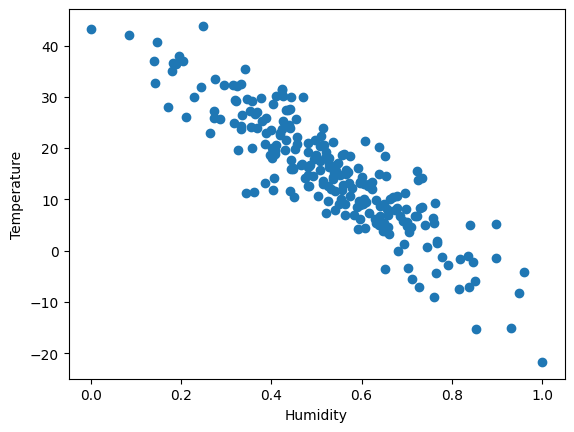

In [143]:
plot(X, Y)

In [144]:
ny.random.seed(2)
theta = ny.random.rand(2,1)

def hypothesis(X, theta):
    return theta[0] + theta[1] * X

In [145]:
def line(theta):
    axes = plt.gca()
    x_value = ny.array(axes.get_xlim())
    y_value = hypothesis(x_value, theta)
    plt.plot(x_value, y_value, '--')

In [146]:
def draw(X, Y, theta):
    plot(X, Y)
    line(theta)

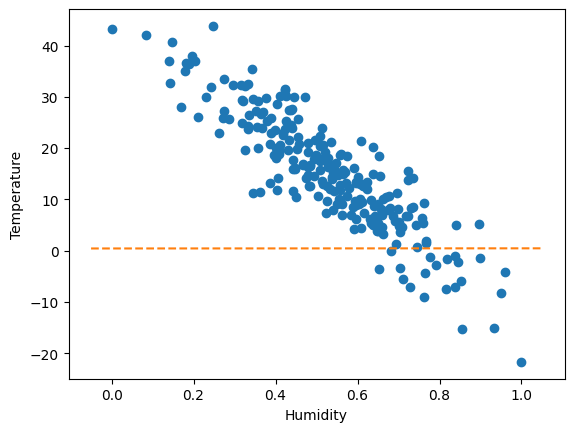

In [147]:
draw(X, Y, theta)

In [148]:
m = len(data.train)
def cost(X, Y, theta):
    return (1/(2*m)) * ny.sum((hypothesis(X, theta) - Y)**2)

In [149]:
cost(X, Y, theta)

171.4235488910645

In [150]:
def gradient_descent(X, Y, theta, alpha, steps):
    for i in range(steps):
        old = cost(X, Y, theta)
        temp0 = theta[0] - alpha * (1/m) * ny.sum(hypothesis(X, theta) - Y)
        temp1 = theta[1] - alpha * (1/m) * ny.dot((hypothesis(X, theta) - Y), X)
        theta[0] = temp0
        theta[1] = temp1
        new = cost(X, Y, theta)
        if(new < old):
            print("Decreasing: ", new)
        else:
            print("INCREASE")

In [151]:
gradient_descent(X, Y, theta, alpha = 0.01, steps = 10000)

Decreasing:  168.89736265167582
Decreasing:  166.43508772490156
Decreasing:  164.0350893239823
Decreasing:  161.69577448683236
Decreasing:  159.41559100598613
Decreasing:  157.1930263859203
Decreasing:  155.02660682705312
Decreasing:  152.91489623573702
Decreasing:  150.8564952595791
Decreasing:  148.85004034744372
Decreasing:  146.89420283350265
Decreasing:  144.9876880447204
Decreasing:  143.12923443117307
Decreasing:  141.3176127186178
Decreasing:  139.5516250827429
Decreasing:  137.8301043445445
Decreasing:  136.15191318628828
Decreasing:  134.51594338753094
Decreasing:  132.92111508068712
Decreasing:  131.36637602564215
Decreasing:  129.85070090292348
Decreasing:  128.37309062495547
Decreasing:  126.93257166493558
Decreasing:  125.52819540288061
Decreasing:  124.15903748840377
Decreasing:  122.82419721979488
Decreasing:  121.52279693898618
Decreasing:  120.25398144199747
Decreasing:  119.01691740446479
Decreasing:  117.81079282186631
Decreasing:  116.63481646406976
Decreasing:  11

Decreasing:  32.97825375344161
Decreasing:  32.96878206598743
Decreasing:  32.95931482611442
Decreasing:  32.949852031734146
Decreasing:  32.94039368075916
Decreasing:  32.93093977110297
Decreasing:  32.921490300680105
Decreasing:  32.91204526740605
Decreasing:  32.90260466919726
Decreasing:  32.8931685039712
Decreasing:  32.88373676964627
Decreasing:  32.87430946414188
Decreasing:  32.86488658537841
Decreasing:  32.855468131277206
Decreasing:  32.84605409976061
Decreasing:  32.83664448875191
Decreasing:  32.8272392961754
Decreasing:  32.817838519956325
Decreasing:  32.80844215802093
Decreasing:  32.7990502082964
Decreasing:  32.789662668710925
Decreasing:  32.78027953719366
Decreasing:  32.77090081167469
Decreasing:  32.761526490085146
Decreasing:  32.75215657035709
Decreasing:  32.742791050423534
Decreasing:  32.733429928218506
Decreasing:  32.72407320167698
Decreasing:  32.714720868734894
Decreasing:  32.70537292732918
Decreasing:  32.69602937539769
Decreasing:  32.68669021087931
De

Decreasing:  21.808225737627975
Decreasing:  21.803999114104215
Decreasing:  21.799774475258612
Decreasing:  21.795551820159222
Decreasing:  21.79133114787455
Decreasing:  21.78711245747354
Decreasing:  21.78289574802556
Decreasing:  21.77868101860042
Decreasing:  21.774468268268375
Decreasing:  21.77025749610011
Decreasing:  21.76604870116674
Decreasing:  21.761841882539827
Decreasing:  21.75763703929136
Decreasing:  21.75343417049378
Decreasing:  21.749233275219943
Decreasing:  21.745034352543154
Decreasing:  21.740837401537153
Decreasing:  21.736642421276102
Decreasing:  21.732449410834608
Decreasing:  21.728258369287715
Decreasing:  21.724069295710894
Decreasing:  21.71988218918005
Decreasing:  21.715697048771535
Decreasing:  21.71151387356212
Decreasing:  21.707332662629018
Decreasing:  21.70315341504986
Decreasing:  21.698976129902732
Decreasing:  21.69480080626614
Decreasing:  21.69062744321903
Decreasing:  21.68645603984077
Decreasing:  21.68228659521117
Decreasing:  21.6781191

Decreasing:  16.323813558777573
Decreasing:  16.322162228033573
Decreasing:  16.320511672698128
Decreasing:  16.31886189240714
Decreasing:  16.317212886796668
Decreasing:  16.31556465550295
Decreasing:  16.313917198162397
Decreasing:  16.312270514411583
Decreasing:  16.31062460388726
Decreasing:  16.308979466226344
Decreasing:  16.307335101065927
Decreasing:  16.305691508043267
Decreasing:  16.304048686795795
Decreasing:  16.302406636961113
Decreasing:  16.300765358176992
Decreasing:  16.29912485008137
Decreasing:  16.297485112312366
Decreasing:  16.29584614450825
Decreasing:  16.294207946307477
Decreasing:  16.292570517348672
Decreasing:  16.29093385727062
Decreasing:  16.289297965712283
Decreasing:  16.28766284231279
Decreasing:  16.286028486711437
Decreasing:  16.284394898547696
Decreasing:  16.282762077461207
Decreasing:  16.28113002309177
Decreasing:  16.279498735079365
Decreasing:  16.27786821306413
Decreasing:  16.276238456686393
Decreasing:  16.27460946558663
Decreasing:  16.27

Decreasing:  14.116797031573416
Decreasing:  14.11618204046655
Decreasing:  14.115567338138513
Decreasing:  14.114952924453712
Decreasing:  14.114338799276608
Decreasing:  14.113724962471728
Decreasing:  14.11311141390366
Decreasing:  14.11249815343706
Decreasing:  14.111885180936646
Decreasing:  14.111272496267198
Decreasing:  14.110660099293561
Decreasing:  14.11004798988064
Decreasing:  14.109436167893408
Decreasing:  14.108824633196903
Decreasing:  14.108213385656223
Decreasing:  14.10760242513652
Decreasing:  14.106991751503028
Decreasing:  14.106381364621033
Decreasing:  14.105771264355882
Decreasing:  14.105161450573
Decreasing:  14.104551923137851
Decreasing:  14.103942681915987
Decreasing:  14.103333726773007
Decreasing:  14.102725057574574
Decreasing:  14.102116674186428
Decreasing:  14.101508576474357
Decreasing:  14.10090076430422
Decreasing:  14.100293237541932
Decreasing:  14.099685996053474
Decreasing:  14.099079039704897
Decreasing:  14.098472368362307
Decreasing:  14.0

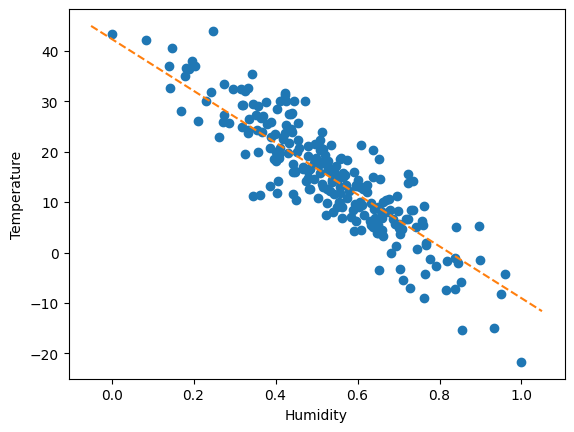

In [152]:
draw(X, Y, theta)

In [153]:
test_x = ny.array(data.test.Humidity)
test_y = ny.array(data.test.Temperature)

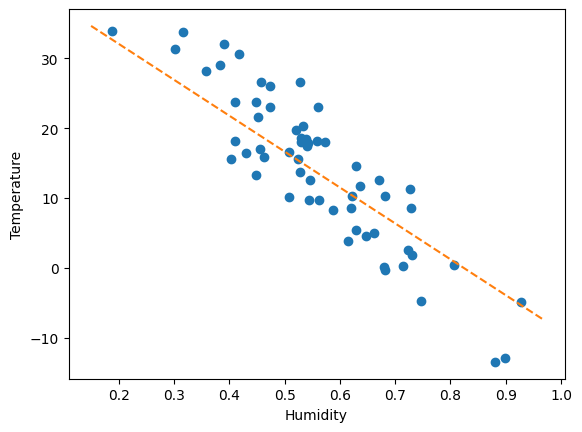

In [154]:
draw(test_x, test_y, theta)

In [155]:
def error(x, y, theta):
    test_predict = hypothesis(x, theta)
    return abs(y - test_predict)

In [156]:
m = len(test_x)
s = 0
for i in range(m):
    s += error(test_x[i], test_y[i], theta)
s/m

array([4.60300211])